# nmi | 2024 spring
## lecture 06 : systems of equations : nonlinear systems


why stop at one? part four.
</br>


### 2.7 nonlinear systems of equations


#### 2.7.1 multivariate newtons method


heres with one:
</br></br>

$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.$$
</br>

and heres a few:
</br></br>

\begin{align}
  f_1(u,v,w) &= 0 \\
  f_2(u,v,w) &= 0 \\
  f_3(u,v,w) &= 0.
\end{align}
</br>

let vector-valued function $F(u,v,w) = (f_1,f_2,f_3)$ and problem be $F(x) = 0$ where $x = (u,v,w)$.
</br></br>

the analogue of derivative $f'$ for one variable becomes the <b>jacobian matrix</b>
</br></br>

\begin{align}
  DF(x) =
  \begin{bmatrix}
    \frac{\partial f_1}{\partial u} &
      \frac{\partial f_1}{\partial v} &
      \frac{\partial f_1}{\partial w} \\
    \frac{\partial f_2}{\partial u} &
      \frac{\partial f_2}{\partial v} &
      \frac{\partial f_2}{\partial w} \\
    \frac{\partial f_3}{\partial u} &
      \frac{\partial f_3}{\partial v} &
      \frac{\partial f_3}{\partial w} \\
  \end{bmatrix}
\end{align}
</br>


both one-variable and multivariate derive from linear approximation afforded by taylor expansion. for the latter,
</br></br>

$$F(x) = F(x_0) + DF(x_0)\cdot(x-x_0) + \mathcal{O}(x-x_0)^2$$
</br>

eg, linear expansion of $F(u,v) = (e^{u+v},sinu)$ around $x_0 = (0,0)$,
</br></br>

\begin{align}
  F(x) &=
  \begin{bmatrix} 1 \\ 0 \end{bmatrix}
  + \begin{bmatrix} e^0 & e^0 \\ cos0 & 0 \end{bmatrix}
  \begin{bmatrix} u \\ v \end{bmatrix} + \mathcal{O}(x^2) \\
  &= \begin{bmatrix} 1 \\ 0 \end{bmatrix}
  + \begin{bmatrix} u+v \\ u \end{bmatrix} + \mathcal{O}(x^2)
\end{align}
</br>

oc ignore $\mathcal{O}(x^2)$ like 1D and let $x=r$ be the root and $x_0$ be current guess. then
</br></br>

\begin{align}
  0 &= F(r) \approx F(x_0) + DF(x_0)\cdot(r-x_0) \\
  \\
  &\Rightarrow -DF(x_0)^{-1}F(x_0) \approx r - x_0
\end{align}
</br>


##### algorithm


<b>mutlivariate newtons method</b>
</br></br>

\begin{align}
  x_0 &= \text{initial vector} \\
  x_{k+1} &= x_k - (DF(x_k))^{-1}F(x_k), \quad k=0,1,2,\dots
\end{align}
</br>


inverses are costly so avoid them.
</br></br>

\begin{align}
  DF(x_k)s &= -F(x_k) \\
  x_{k+1} &= x_k + s
\end{align}
</br>


##### ex 32


apply newtons multivariate with $x_0 = (1,2)$,
</br></br>

\begin{align}
  v - u^3 &= 0 \\
  u^2 + v^2 &= 1
\end{align}
</br>

\begin{align}
  f_1(u,v) &= v-u^3 \\
  f_2(u,v) &= u^2 + v^2 - 1
\end{align}
</br>

\begin{align}
  DF(u,v) &= \begin{bmatrix} -3u^2 & 1 \\ 2u & 2v \end{bmatrix}.
\end{align}
</br>

with $x_0 = (1,2)$,
</br></br>

\begin{align}
\underbrace{
  \begin{bmatrix} -3 & 1 \\ 2 & 4 \end{bmatrix}
}_{DF(x_0)}
\begin{bmatrix} s_1 \\ s_2 \end{bmatrix}
=-\underbrace{
  \begin{bmatrix} 1 \\ 4 \end{bmatrix}
}_{F(x_0)}
\end{align}
</br>

with $s = (0,-1) \Rightarrow x_1 = x_0 + s = (1,1)$,
</br></br>

\begin{align}
\underbrace{
  \begin{bmatrix} -3 & 1 \\ 2 & 2 \end{bmatrix}
}_{DF(x_1)}
\begin{bmatrix} s_1 \\ s_2 \end{bmatrix}
=-\underbrace{
  \begin{bmatrix} 0 \\ 1 \end{bmatrix}
}_{F(x_1)}
\end{align}
</br>

with $s = (-\frac{1}{8},-\frac{3}{8}) \Rightarrow x_2 = x_1 + s = (\frac{7}{8},\frac{5}{8})$.
</br></br>

further steps below.
</br>


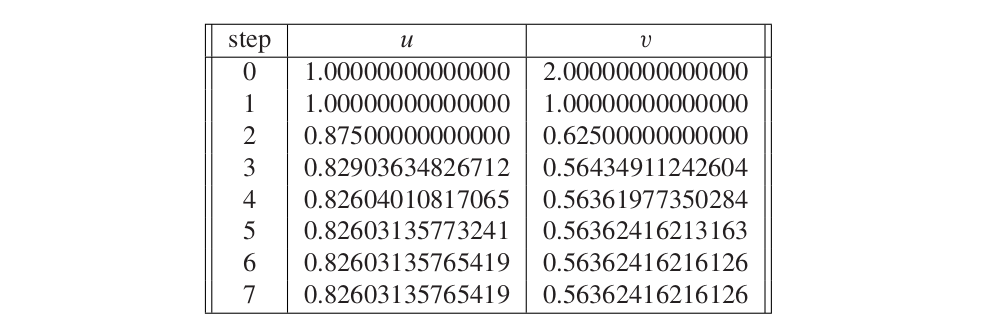

note the quadratic convergence, hooray.
</br>


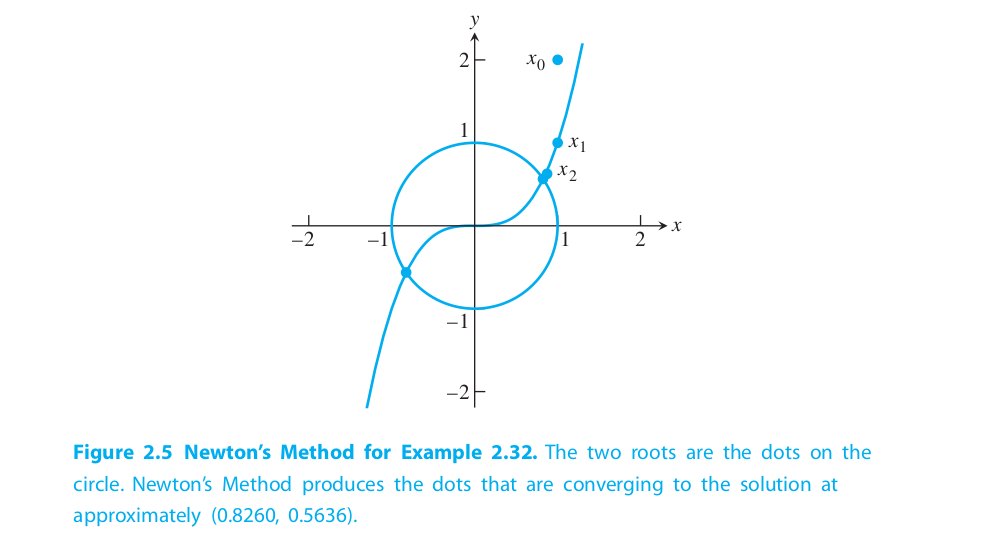

#### 2.7.2 broydens method


like how there is secant to newton-raphson 1D, here is broydens for when there are no derivatives.
</br>


suppose $A_i$ is best approximation available at step $i$ to the jacobian matrix, then
</br></br>

$$x_{i+1} = x_i - A_i^{-1}F(x_i).$$
</br>

to update $A_i$ to $A_{i+1}$, respect the derivative aspect of jacobian $DF$,
</br></br>

$$A_{i+1}\delta_{i+1} = \Delta_{i+1},$$
</br>

where $\delta_{i+1} = x_{i+1} - x_i, \Delta_{i+1} = F(x_{i+1})$. bc no new information for orthogonal component of $\delta_{i+1}$,
</br></br>

$$A_{i+1}w = A_iw$$
</br>

for every $w$ such that $\delta_{i+1}^Tw = 0$.
</br></br>

$$A_{i+1} = A_i + \frac{(\Delta_{i+1}-A_i\delta_i)\delta_{i+1}^T}{\delta_{i+1}^T\delta_{i+1}}.$$
</br>

broydens needs intial guess $x_0$ and initial approximate jacobian $A_0$, which can be identity matrix if no better guess.
</br>


##### algorithm


<b>broydens method i</b>

```
x0 = initial vector
A0 = initial matrix
for i = 0, 1, 2, ...
  x[i+1] = x[i] - inv(A[i])F(x[i])
  A[i+1] = A[i] + (Δ[i+1]-A[i]δ[i+1])T(δ[i+1])/(T(δ[i+1])δ[i+1])
end

# where δ[i+1] = x[i+1] - x[i] and Δ[i+1] = F(x[i+1]) - F(x[i]).
```



###### cheaper


to remove costly solver at $A_i\delta_{i+1} = F(x_i)$, use an inverse.
</br></br>

let $B_i = A_i^{-1}$. then
</br></br>

$$\delta_{i+1} = B_{i+1}\Delta_{i+1},$$
</br>

where $\delta_{i+1} = x_{i+1} - x_i, \Delta_{i+1} = F(x_{i+1}) - F(x_i)$ and for every $w$ satisfying $\delta_{i+1}^Tw = 0$, still satisfy $A_{i+1}w = A_iw$, or
</br></br>

$$B_{i+1}A_iw = w.$$
</br>

a matrix that satisfies these two conditions is
</br></br>

$$B_{i+1} = B_i + \frac{(\delta_{i+1} - B_i\Delta_{i+1})\delta_{i+1}^TB_i}{\delta_{i+1}^TB_i\Delta_{i+1}}.$$
</br>

and
</br></br>

$$x_{i+1} = x_i + B_iF(x_i).$$
</br>

as with broydens i, ii needs intial guess $x_0$ and initial jacobian substitute $B_0$, which can be identity matrix if no better guess.
</br>


##### algorithm


<b>broydens method ii</b>
</br></br>

```
x0 = initial vector
B0 = initial matrix
for i = 0, 1, 2, ...
  x[i+1] = x[i] - B[i]F(x[i])
  B[i+1] = B[i] + (δ[i+1]-B[i]Δ[i+1])T(δ[i+1])B[i]/(T(δ[i+1])B[i]Δ[i+1])
end

# where δ[i] = x[i] - x[i-1] and Δ[i] = F(x[i]) - F(x[i-1]).
```



##### usw


a perceived disadvantage to broyden ii is that estimates for the jacobian are not easily available. $B_i$ is an estimate for the matrix inverse of the jacobian. broyden i keeps track of $A_i$ which is the estimate of the jacobian. which is why i is "good broyden" and ii is "bad broyden".
</br></br>

like secant to newton, broyden converges slower than newtons multivariate.
</br>
